# <center>Data Analysis 3 - Assignment 1<center>
    
<center>Created by Zsófia Rebeka Katona</center>


Build four predictive models using linear regression for earnings per hour.
1. Models: the target variable is earnings per hour, all others would be predictors

In [1]:
# Importing the required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from statsmodels.tools.eval_measures import mse,rmse

In [2]:
# Importing the prewritten helper functions
from py_helper_functions import *

In [3]:
# Reading the data
data = pd.read_csv("morg-2014-emp.csv")

# Checking if the data was correctly loaded
data.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149316 entries, 0 to 149315
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149316 non-null  int64  
 1   hhid        149316 non-null  int64  
 2   intmonth    149316 non-null  object 
 3   stfips      149316 non-null  object 
 4   weight      149316 non-null  float64
 5   earnwke     149316 non-null  float64
 6   uhours      149316 non-null  int64  
 7   grade92     149316 non-null  int64  
 8   race        149316 non-null  int64  
 9   ethnic      20071 non-null   float64
 10  age         149316 non-null  int64  
 11  sex         149316 non-null  int64  
 12  marital     149316 non-null  int64  
 13  ownchild    149316 non-null  int64  
 14  chldpres    149316 non-null  int64  
 15  prcitshp    149316 non-null  object 
 16  state       149316 non-null  object 
 17  ind02       149316 non-null  object 
 18  occ2012     149316 non-null  int64  
 19  cl

### Exploratory Data Analysis

In [5]:
data.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

In [6]:
# Filtering for Human resource managers (0136) and Human resource workers (630)
data = data[data['occ2012'].isin([136, 630])]
data

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
271,598,992279930309004,January,AK,360.3615,923.00,40,43,1,NaN,...,1,4,"Native, Born In US",94,Support activities for mining (213),136,"Private, For Profit",No,No,Employed-At Work
545,1236,5017808077661,January,CA,3452.5706,1615.38,40,39,1,NaN,...,1,3,"Native, Born In US",93,Executive offices and legislative bodies (9211...,630,Government - Federal,No,No,Employed-At Work
601,1351,65520360020508,January,CA,3457.9806,807.69,40,44,1,1.0,...,0,0,"Native, Born In US",93,"Museums, art galleries, historical sites, and ...",136,"Private, Nonprofit",No,No,Employed-At Work
695,1569,256080630550002,January,CA,2889.1284,807.00,40,44,1,7.0,...,0,0,"Native, Born In US",93,"Museums, art galleries, historical sites, and ...",136,"Private, Nonprofit",No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148598,315498,58305630783096,December,WA,3039.5721,600.00,37,39,1,1.0,...,0,0,"Native, Born In US",9,"Other amusement, gambling, and recreation indu...",630,"Private, For Profit",No,No,Employed-At Work
148774,315915,108415040044617,December,WV,673.5209,668.42,38,43,1,NaN,...,0,0,"Native, Born In US",5,Outpatient care centers (6214),136,"Private, For Profit",No,No,Employed-At Work
148827,316049,505181410066,December,WV,539.8396,115.38,50,44,1,NaN,...,0,0,"Native, Born In US",5,"Other schools, instruction, and educational se...",630,"Private, Nonprofit",No,No,Employed-Absent
148943,316329,102506390510951,December,WI,3529.8688,692.40,40,43,1,NaN,...,0,0,"Native, Born In US",3,Computer systems design and related services (...,630,"Private, For Profit",No,No,Employed-At Work


### Creating variables:
- earnings per hour
- log earnings per hour
- female as a dummy variable
- age squared
- level of education

In [7]:
# Creating new variable: earnings per hour
data["earnphour"] = data["earnwke"] / data["uhours"]
data["lnearnphour"] = np.log(data["earnphour"])
data["female"] = (data["sex"] == 2)
data["agesq"] = np.power(data["age"], 2)
data["edu"] = data["grade92"]

In [8]:
# Grouping educational levels and creating dummies
# 'hsedu' referring to high school education
# "higheredu" referring to higher education, including Bachelors, Masters, PhD and Professional degrees
data["hsedu"] = (data["grade92"] == 39).astype(int)
data["higheredu"] = (data["grade92"].isin([40, 41 ,42 , 43, 44, 45, 46]).astype(int))

<Axes: >

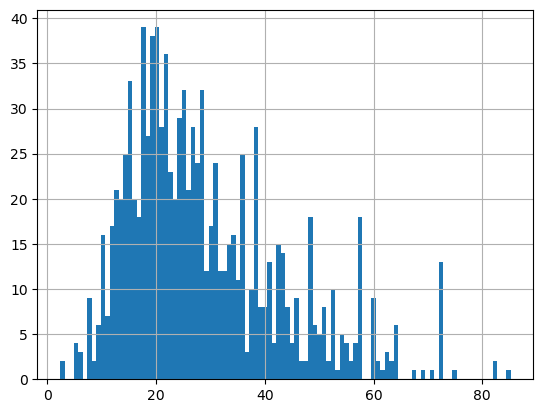

In [9]:
# Checking for the quality of the distribution and sufficient variation
data.earnphour.hist(bins=100)

<Axes: >

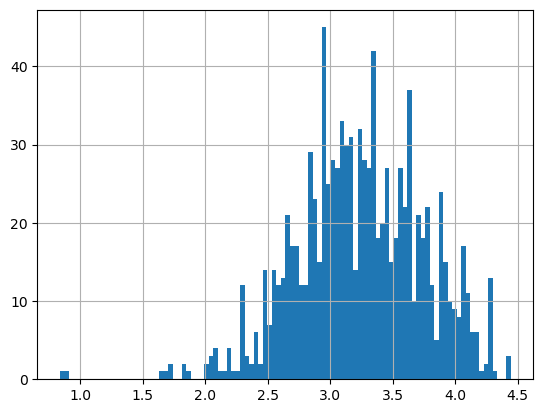

In [10]:
# Checking the log earnings per hour distribution
data.lnearnphour.hist(bins=100)

In [11]:
# Checking if we have 0 or missing values
data.sort_values(by = 'earnphour')

# There are no values = 0

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,unionmme,unioncov,lfsr94,earnphour,lnearnphour,female,agesq,edu,hsedu,higheredu
148827,316049,505181410066,December,WV,539.8396,115.38,50,44,1,NaN,...,No,No,Employed-Absent,2.307600,0.836208,False,3364,44,0,1
4714,10248,202033508042251,January,LA,3390.3011,96.15,40,44,1,NaN,...,No,No,Employed-At Work,2.403750,0.877030,False,900,44,0,1
36996,78975,126068879100966,April,AL,3400.8182,230.00,45,39,1,NaN,...,No,No,Employed-At Work,5.111111,1.631417,True,2601,39,1,0
89718,190683,502906731999943,August,GA,2870.6039,213.69,40,43,1,1.0,...,No,No,Employed-At Work,5.342250,1.675647,True,1521,43,0,1
31302,66879,803016065908994,March,MT,1024.6256,83.07,15,40,1,NaN,...,No,No,Employed-At Work,5.538000,1.711633,False,441,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144685,307293,196090160000301,December,NY,3191.0810,2884.61,40,44,1,NaN,...,No,No,Employed-At Work,72.115250,4.278266,True,3721,44,0,1
133206,282636,43059686300841,November,OH,2733.3221,1200.00,16,43,1,NaN,...,No,No,Employed-At Work,75.000000,4.317488,True,3969,43,0,1
56830,121226,396947702067673,May,NY,2759.8090,2884.61,35,44,2,NaN,...,No,No,Employed-At Work,82.417429,4.411797,True,1369,44,0,1
30576,65402,450974079025329,March,MN,1767.7635,2307.69,28,45,1,NaN,...,No,No,Employed-At Work,82.417500,4.411798,True,2809,45,0,1


In [12]:
# Checking for NaN in the 'earnwke' column
data.loc[data["earnphour"].isna()]

# There are no missing values

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,unionmme,unioncov,lfsr94,earnphour,lnearnphour,female,agesq,edu,hsedu,higheredu


#### Model 1. - Regression of earnings per hour on women

In [13]:
# Creating the regression and checking the summary of regression
reg1 = smf.ols(formula="lnearnphour~female", data=data).fit(cov_type="HC1")
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            lnearnphour   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.62
Date:                Tue, 16 Jan 2024   Prob (F-statistic):            0.00116
Time:                        16:55:59   Log-Likelihood:                -741.97
No. Observations:                1017   AIC:                             1488.
Df Residuals:                    1015   BIC:                             1498.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3370      0.036     92.989      0.000       3.267       3.407
female[T.True]    -0.1297      0.040     -3.259      0.001      -0.208      -0.052
==============================================================================
Omnibus:                       39.598   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.233
Skew:                          -0.375   Prob(JB):                     1.67e-12
Kurtosis:                       3.847   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [14]:
# Summary in another form
print(reg1.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:            lnearnphour   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.62
Date:                Tue, 16 Jan 2024   Prob (F-statistic):            0.00116
Time:                        16:55:59   Log-Likelihood:                -741.97
No. Observations:                1017   AIC:                             1488.
Df Residuals:                    1015   BIC:                             1498.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3370      0.036     92.

In [15]:
reg1.bic

1497.779408682388

#### Model 2.: Expanding the model by adding the age variable

In [16]:
reg2 = smf.ols(formula="lnearnphour~female + age", data=data).fit(cov_type="HC1")
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            lnearnphour   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     44.33
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           3.48e-19
Time:                        16:55:59   Log-Likelihood:                -707.90
No. Observations:                1017   AIC:                             1422.
Df Residuals:                    1014   BIC:                             1437.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8627      0.070     40.869      0.000       2.725       3.000
female[T.True]    -0.1276      0.038     -3.378      0.001      -0.202      -0.054
age                0.0112      0.001      8.199      0.000       0.009       0.014
==============================================================================
Omnibus:                       44.522   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.829
Skew:                          -0.379   Prob(JB):                     3.08e-15
Kurtosis:                       4.001   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [17]:
reg2.bic

1436.5677271037898

In [18]:
stargazer = Stargazer([reg1, reg2])
stargazer.covariate_order(["female[T.True]", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

#### Model 3. Expanding the model by adding the age squared variable

In [19]:
reg3 = smf.ols(formula="lnearnphour~ female + age + agesq", data=data).fit(cov_type="HC1")
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            lnearnphour   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     61.62
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           1.35e-36
Time:                        16:55:59   Log-Likelihood:                -677.11
No. Observations:                1017   AIC:                             1362.
Df Residuals:                    1013   BIC:                             1382.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3610      0.195      6.969      0.000       0.978       1.744
female[T.True]    -0.1371      0.036     -3.790      0.000      -0.208      -0.066
age                0.0884      0.010      9.298      0.000       0.070       0.107
agesq             -0.0009      0.000     -8.122      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       55.115   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.262
Skew:                          -0.420   Prob(JB):                     2.51e-20
Kurtosis:                       4.193   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
reg3.bic

1381.9162069154063

In [21]:
reg4 = smf.ols(formula="lnearnphour~ female + age + agesq + higheredu", data=data).fit(cov_type="HC1")
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            lnearnphour   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     50.90
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           4.50e-39
Time:                        16:55:59   Log-Likelihood:                -662.57
No. Observations:                1017   AIC:                             1335.
Df Residuals:                    1012   BIC:                             1360.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1607      0.202      5.748      0.000       0.765       1.556
female[T.True]    -0.1302      0.036     -3.628      0.000      -0.200      -0.060
age                0.0868      0.010      9.086      0.000       0.068       0.105
agesq             -0.0009      0.000     -7.833      0.000      -0.001      -0.001
higheredu          0.2358      0.045      5.186      0.000       0.147       0.325
==============================================================================
Omnibus:                       57.583   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.994
Skew:                          -0.411   Prob(JB):                     7.12e-23
Kurtosis:                       4.316   Cond. No.                     2.93e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
models = [reg1, reg2, reg3, reg4]
robustcov_results=[]

for i, model in enumerate(models):
    result=model.get_robustcov_results(cov_type='HC1').summary()
    robustcov_results.append(result)
    print()
    print(f'Regression: reg{i+1}')
    print(result)


Regression: reg1
                            OLS Regression Results                            
Dep. Variable:            lnearnphour   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.62
Date:                Tue, 16 Jan 2024   Prob (F-statistic):            0.00116
Time:                        16:55:59   Log-Likelihood:                -741.97
No. Observations:                1017   AIC:                             1488.
Df Residuals:                    1015   BIC:                             1498.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3370 

In [23]:
bic = [round(x.bic, 2) for x in [reg1,reg2,reg3,reg4]]
sg = stargazer([reg1,reg2,reg3,reg4])
sg.add_line('BIC', bic, location=stargazer.LineLocation.FOOTER_BOTTOM)
sg

TypeError: 'Stargazer' object is not callable

#### Model 2.: Linear Regression with cross-validation

In [24]:
from sklearn.model_selection import KFold
k = KFold(n_splits=4, shuffle=False, random_state=None)

In [25]:
def cv_reg(formula, data, kfold, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data=data_train).fit()
        else:
            model = smf.ols(formula, data=data_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(data_test)]
        rsquared += [model.rsquared]
        rmse_list += [rmse(data_train[formula.split("~")[0]], model.predict())]

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cv_list))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [26]:
#reg1 = smf.ols(formula="lnearnphour~female", data=data).fit(cov_type="HC1")
#reg2 = smf.ols(formula="lnearnphour~female + age", data=data).fit(cov_type="HC1")
#reg3 = smf.ols(formula="lnearnphour~ female + age + agesq", data=data).fit(cov_type="HC1")
#reg4 = smf.ols(formula="lnearnphour~ female + age + agesq + higheredu", data=data).fit(cov_type="HC1")

cv1 = cv_reg("lnearnphour~female", data, k, "HC0")
cv2 = cv_reg("lnearnphour~female + age", data, k, "HC0")
cv3 = cv_reg("lnearnphour~ female + age + agesq", data, k, "HC0")
cv4 = cv_reg("lnearnphour~ female + age + agesq + higheredu", data, k, "HC0")

cv_list = [cv1, cv2, cv3, cv4]

In [27]:
summarize_cv(cv_list)

,Model1,Model2,Model3,Model4
Fold1,0.488944,0.475930,0.465154,0.457060
Fold2,0.509673,0.492929,0.479418,0.473164
Fold3,0.508912,0.491524,0.476257,0.471157
Fold4,0.499668,0.480415,0.461386,0.453696
Average,0.501799,0.485199,0.470554,0.463769


In [28]:
reg1.resid.describe()

count    1.017000e+03
mean    -1.766314e-15
std      5.021361e-01
min     -2.500755e+00
25%     -3.168617e-01
50%     -4.758664e-03
75%      3.502552e-01
max      1.204564e+00
dtype: float64

In [40]:
p1=reg1.get_prediction(data).summary_frame()
p1

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.207233,0.017227,3.173469,3.240997,2.222001,4.192465
1,3.207233,0.017227,3.173469,3.240997,2.222001,4.192465
2,3.207233,0.017227,3.173469,3.240997,2.222001,4.192465
3,3.207233,0.017227,3.173469,3.240997,2.222001,4.192465
4,3.207233,0.017227,3.173469,3.240997,2.222001,4.192465
...,...,...,...,...,...,...
1012,3.207233,0.017227,3.173469,3.240997,2.222001,4.192465
1013,3.207233,0.017227,3.173469,3.240997,2.222001,4.192465
1014,3.336963,0.035886,3.266629,3.407298,2.349801,4.324125
1015,3.207233,0.017227,3.173469,3.240997,2.222001,4.192465


In [41]:
(reg3.fittedvalues-data.lnearnphour).describe()

count    1.017000e+03
mean    -5.806783e-14
std      4.711135e-01
min     -1.193103e+00
25%     -3.157087e-01
50%     -7.260068e-03
75%      2.782943e-01
max      2.573597e+00
dtype: float64

In [43]:
p2=reg3.get_prediction(data).summary_frame()
p2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.017959,0.022007,2.974825,3.061092,2.092222,3.943696
1,3.356173,0.022050,3.312955,3.399391,2.430432,4.281914
2,3.352144,0.022135,3.308761,3.395528,2.426395,4.277893
3,2.981719,0.023391,2.935875,3.027564,2.055852,3.907587
4,3.084946,0.020449,3.044867,3.125026,2.159346,4.010546
...,...,...,...,...,...,...
1012,3.144612,0.020194,3.105033,3.184192,2.219034,4.070191
1013,3.317727,0.025010,3.268709,3.366746,2.391697,4.243757
1014,3.409805,0.040666,3.330102,3.489508,2.481645,4.337965
1015,2.981719,0.023391,2.935875,3.027564,2.055852,3.907587


In [38]:
#get model3 rmse
rmse(reg3.fittedvalues,data.lnearnphour)

0.47088183759305063

In [44]:
pd.DataFrame(
    {
        " ": ["Predicted", "PI_low(95%)", "PI_high(95%)"],
        "Model1": p1[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model3": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
    }
).set_index(" ")

,Model1,Model3
,,
Predicted,3.207233,3.017959
PI_low(95%),2.222001,2.092222
PI_high(95%),4.192465,3.943696


In [46]:
# summary of predictions and PI 80% version
# set alpha to 0.2
# 80 % is narrower as we are more lenient
p1=reg1.get_prediction(data).summary_frame(alpha=0.2)
p2=reg3.get_prediction(data).summary_frame(alpha=0.2)

pd.DataFrame(
    {
        " ": ["Predicted", "PI_low(80%)", "PI_high(80%)"],
        "Model1": p1[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model3": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
    }
).set_index(" ")

,Model1,Model3
,,
Predicted,3.207233,3.017959
PI_low(80%),2.563025,2.412652
PI_high(80%),3.851442,3.623266
